In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow
from sklearn.model_selection import train_test_split

2021-10-17 12:05:46.016686: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-17 12:05:46.016714: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tensorflow.__version__

'2.6.0'

In [3]:
dataframe = pd.read_csv("./titanic.csv", delimiter=",")
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dataframe.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Survived'>

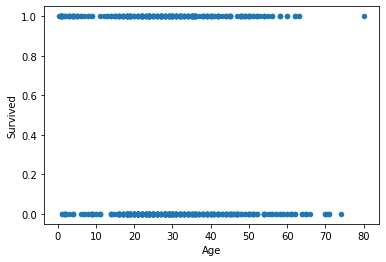

In [6]:
# dataframe[["Age", "Survived"]].plot(kind="scatter")
dataframe.plot.scatter("Age", "Survived") #Age is not a feature

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

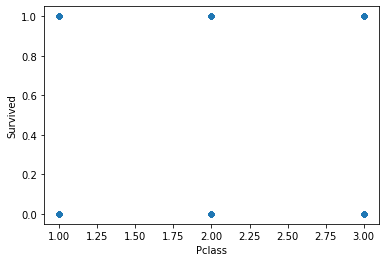

In [7]:
dataframe.plot.scatter("Pclass", "Survived") #Pclass is not a feature

In [8]:
df = dataframe.dropna()

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
df.Parch.unique()

array([0, 1, 2, 4])

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

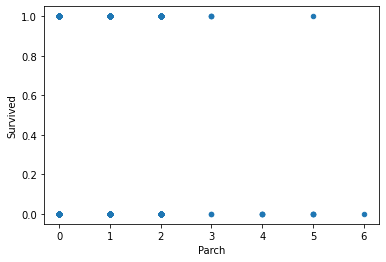

In [11]:
dataframe.plot.scatter("Parch", "Survived")

In [12]:
gender_dummies = pd.get_dummies(df.Sex)

In [13]:
x = df[["Age", "Pclass", "PassengerId",  "Parch"]]
y = df.Survived


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
len(x_train), len(x_test)

(146, 37)

In [16]:
val_x = x_train[:20].to_numpy()
val_y = y_train[:20].to_numpy()
x_train = x_train[20:].to_numpy()
y_train = y_train[20:].to_numpy()

In [17]:
len(val_x), len(x_train)

(20, 126)

In [18]:
len(val_y), len(y_train)

(20, 126)

In [19]:
x_train.shape

(126, 4)

In [20]:
x_train[0]

array([ 36.,   1., 584.,   0.])

In [26]:
x_test.shape

(37, 4)

In [21]:
model = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=(4,), activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adamax", loss="binary_crossentropy", metrics=["accuracy"])

2021-10-17 12:05:50.040155: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-17 12:05:50.040198: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-17 12:05:50.040220: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu-OptiPlex-9010): /proc/driver/nvidia/version does not exist


In [22]:
history = model.fit(x_train, y_train, validation_data=(val_x, val_y), epochs=100, batch_size=50)

2021-10-17 12:05:50.129476: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
3/3 [==============================] - 1s 90ms/step - loss: 14.1217 - accuracy: 0.6349 - val_loss: 2.4969 - val_accuracy: 0.8000
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 2.8349 - accuracy: 0.4841 - val_loss: 6.1686 - val_accuracy: 0.3000
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 3.9766 - accuracy: 0.3413 - val_loss: 0.8891 - val_accuracy: 0.8000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 2.3367 - accuracy: 0.6349 - val_loss: 1.9174 - val_accuracy: 0.7500
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 2.7954 - accuracy: 0.6349 - val_loss: 1.0441 - val_accuracy: 0.7500
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 1.1919 - accuracy: 0.5794 - val_loss: 2.2398 - val_accuracy: 0.2500
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 1.5351 - accuracy: 0.3571 - val_loss: 0.7545 - val_accuracy: 0.7500
Epoch 8/100
3/3 [==

In [23]:
model.evaluate(x_train, y_train)

4/4 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.6667


[0.6238346695899963, 0.6666666865348816]

In [25]:
cm = tensorflow.math.confusion_matrix(y_test, model.predict(x_test))
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  0],
       [27,  0]], dtype=int32)>

Text(69.0, 0.5, 'truth')

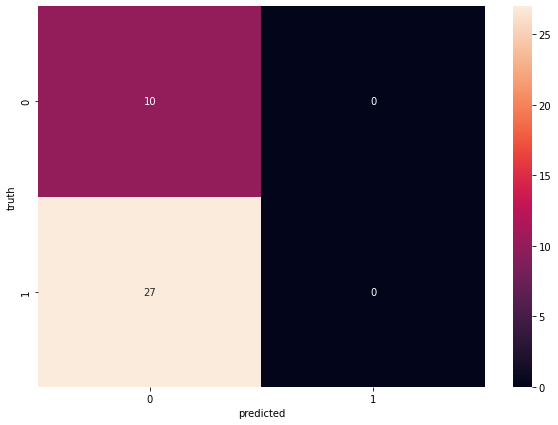

In [29]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")